# Prelab 3

In [1]:
import jlab as jl
from importlib import reload
reload(jl)

<module 'jlab' from '/Users/n1le/Documents/Classes/PHYS 3330/jlab/src/jlab/__init__.py'>

## 5.1 Capacitors
5.1.1 Evaluate the impedance of the capacitor at the two frequency extremes ($\omega = 0$ and $\omega \rightarrow \infty$). Describe what the capacitor acts like at these extremes. 

$Z_C = \frac{1}{j\omega C}$ means that as $\omega \rightarrow 0$, the impedance goes to infinity, effectively acting like an open circuit. As $\omega \rightarrow \infty$, the denominator blows up and the impedance goes to zero, effectively acting like a short circuit.

## 5.2 Capacitance of cables
5.2.1 A BNC cable has an inner conductor with a diameter of roughly 1.1 mm and a dielectric with a diameter of roughly 4.5 mm. The dielectric, Teflon, has a relative dielectric constant of roughly 2. Estimate the capacitance per unit length of this cable in pF/m.

We use the equation derived in this section: 
$$ \frac{C}{\mathcal{l}} = \epsilon_r \epsilon_0 \frac{2\pi}{ln(b/a)}$$
where a is the inner diameter, and b is the outer diameter. $\epsilon_r \approx 2$, and $\epsilon_0 = 8.854 pF/m$. Plugging in the values gives 
$$ \frac{C}{\mathcal{l}} \approx 78.98 pF/m$$

## 5.3 Inductors
5.3.1 Evaluate the impedances of the inductor at the two frequency extremes. Compare these results to what you found for the capacitor.

We use $Z_L = j\omega L$, so as $\omega =0$, $Z_L = 0$ acting like a short circuit, and as $\omega \rightarrow \infty$, the resistance becomes infinite acting like an open circuit. This is opposite to the behavior for the capacitor as it was proportional to one over $\omega$, whereas the inductor is directly proportional to $\omega$.

## 5.4 Low pass Filters
5.4.1 Find $T_{low-pass}$ when $\omega = 0$ and when $\omega \rightarrow \infty$. Based on these calculations, describe what frequencies the low-pass filter cuts and passes. Is this consistent with its name?

$T_{low-pass}(\omega) = \frac{1}{1+ j\omega RC}$, so as $\omega = 0$ we find $T_{low-pass} (0) = \frac{1}{1} = 1$ and as $\omega \rightarrow \infty$, $T_{low-pass} = \frac{1}{j\omega}$, but $\omega$ is large, so this goes to zero. This means large frequencies are filtered out, and low frequencies are conserved. I would say this might be a bit backwards, as the name suggests it filters low frequencies.

5.4.2 Find $|T_{low-pass}|$ and express it with respect to $f$ instead of $\omega$

$$|T| = \sqrt{TT^*} = \sqrt{ \frac{1}{1+j\omega RC} \cdot \frac{1}{1-j\omega RC}} = \sqrt{\frac{1}{1 + \omega^2 R^2 C^2}}$$

now we use $\omega = 2 \pi f$ to give

$$ |T_{low-pass}| = \sqrt{\frac{1}{1+4\pi^2 f^2 R^2 C^2}} $$

5.4.3 Write two Python functions:
- one that calculates |T| with R, C, $f$ as inputs
- one that calculates $\delta$ with the same inputs (convert radians to degrees)

In [2]:
# Write two Python functions:
# - one that calculates |T| with R, C, $f$ as inputs
# - one that calculates $\delta$ with the same inputs (convert radians to degrees)

def lowpass_gain(R, C, f):
    import math
    omega = 2 * math.pi * f
    magnitude = 1 / math.sqrt(1 + (omega * R * C) ** 2)
    return magnitude

def lowpass_delta_angle(R, C, f):
    import math
    omega = 2 * math.pi * f
    delta_radians = -math.atan(omega * R * C)
    delta_degrees = math.degrees(delta_radians)
    return delta_degrees

# 5.5 High-Pass Filters
5.5.1 Find $T_{high-pass}$ for $\omega = 0$ and $\omega \rightarrow \infty$ to confirm this is a high pass filter.

We have $T_{high-pass} = \frac{j\omega RC}{1+j \omega RC}$, so as $\omega = 0$, the denominator is $1$ and the numerator is $0$, so $T_{high-pass} = 0$. As $\omega \rightarrow \infty$, the one in the denominator is dominated by the $\omega$ and we end up with a matching numerator and denominator so $T_{high-pass} = 1$. This indeed passes high frequencies and cuts low frequencies.

5.5.2 Calculate $|T_{high-pass}|$ and express it in terms of $f$ instead of $\omega$

$$ |T_{high-pass}| = \sqrt{TT^*} = \sqrt{ \frac{j\omega RC \cdot (-j\omega RC)}{(1+j\omega RC)(1-j\omega RC)} } = \sqrt{ \frac{(\omega RC)^2}{1+(\omega RC)^2} } = \omega RC \sqrt{\frac{1}{1+(\omega RC)^2}}$$
and again, we use $\omega = 2\pi f$ to give
$$|T_{high-pass}| = 2\pi f RC \sqrt{\frac{1}{1+4\pi^2 f^2 R^2 C^2}}$$

5.5.3 Write two python functions
- one that calculates $|T|$ with R, C, and f as inputs
- one that calculates $\delta$ with the same inputs (convert radians to degrees)

In [3]:
def highpass_gain(R, C, f):
    import math
    omega = 2 * math.pi * f
    magnitude = (omega * R * C) / math.sqrt(1 + (omega * R * C) ** 2)
    return magnitude

def highpass_delta_angle(R, C, f):
    import math
    omega = 2 * math.pi * f
    delta_radians = math.atan(1 / (omega * R * C))
    delta_degrees = math.degrees(delta_radians)
    return delta_degrees

## 5.6 Cutoff Frequency
**Definition: Half power point or cutoff frequecy or corner frequency or 3dB frequency $f_c$ is the frequency seperating the pass and attenuation bands. It is the frequency at the half-power (-3dB) point, where the power transmitted is half of the maximum possible power.**

The relationship between voltage and power is
$$P = \frac{V^2}{Z}$$
so when the power is cut in half, the voltage is cut by a factor of $\frac{1}{\sqrt{2}} \approx 0.707$. So given 
$$ \frac{V_{out}}{V_{in}} = \sqrt{\frac{P_{out}}{P_{in}}} \approx 0.707$$
so the cutoff frequency is the frequency at which $T\approx 0.707$. For both high and low pass filters, you can take the magnitude of the transfer function and set it equal to $\frac{1}{\sqrt{2}}$, leading to the same result for both filters
$$f_c = \frac{1}{2\pi RC}.$$

5.6.1 A decibel is a relative unit of measurement. In electronics, db are meant to describe how the power changes. You can calculate db with the following equation
$$ 10 \log_{10} \left[ \frac{P_{out}}{P_{in}} \right] dB$$
When the decibels are negative, it means the power is attenuated (reduced), and when positive, means there is power gain.

Calculate the decibels for when the power is cut in half. Does it make sense that the half power point is also called the 3dB point?

When power is cut in half, $P_{out}/P_{in} = \frac{1}{2}$, so 
$$ 10 \log_{10} \left[ \frac{1}{2} \right] dB \approx 10 \cdot (-0.301) dB = -3.01 dB.$$
It makes sense that this is called the 3dB point since this is what we get.

5.6.2 Plug the cutoff frequency into the equations you found for $|T_{low-pass}|$ and $|T_{high-pass}|$ to confirm this is the half power point.

With $f_c = \frac{1}{2\pi RC}$,

$$|T_{low-pass}| = \sqrt{\frac{1}{1+4\pi^2 f^2 R^2 C^2}} = \sqrt{\frac{1}{1+4\pi^2 \frac{1}{4\pi^2 R^2 C^2} R^2 C^2}} = \frac{1}{\sqrt{2}}$$
and
$$ |T_{high-pass}| = 2\pi f RC \sqrt{\frac{1}{1+4\pi^2 f^2 R^2 C^2}} = 2\pi \cdot \frac{1}{2\pi RC} RC \sqrt{\frac{1}{1+4\pi^2 \frac{1}{4\pi^2 R^2 C^2} R^2 C^2}} = \frac{1}{\sqrt{2}}$$
Indeed, this is the half power point.

5.6.3 Evaluate $V_{out}(\tau)$; i.e. the voltage across the capacitor when $t=\tau$. Experimentally, you can measure the time it takes for the capacitor to discharge to this voltage. When the voltage is $V_{out}(\tau)$, then the time it takes to discharge to this voltage will be $\tau = RC$; therefore, measure the time it takes to reach this voltage is a measure of $RC$ which you can use to calculate $f_c$.

When $t=\tau$, we have $V_{out}(t) = V_0 e^{-\tau/\tau} = \frac{V_0}{e}$. $RC$ has units of time, so $f_c = \frac{1}{2\pi RC} = \frac{1}{2\pi \tau}$.

## 5.7 Parallel LCR Bandpass Filters
5.7.1 As the name suggests, this filter passes a "band" of frequencies. This means that it should "cut" both low and high frequencies. Show that at $\omega = 0$ and $\omega \rightarrow \infty$ the magnitude of $T$ goes to zero.

Using 
$$|T_{bandpass}| = \frac{\omega L}{\sqrt{(R-\omega^2 LRC)^2 + (\omega L)^2}}$$
we can see that as $\omega = 0$, the denominator is nonzero, but the numerator goes to zero. As $\omega \rightarrow \infty$, the function goes like 
$$\frac{\omega}{\sqrt{(-\omega^2)^2 + \omega^2 }} \sim \frac{\omega}{\omega^2} = \frac{1}{\omega} \sim 0$$
as required for this filter.

5.7.2 The center frequency $f_0$ is defined by the frequency that maximizes the transfer function. For these simple LRC bandpass filters, this happens when $|T_{bandpass}| = 1$. Find $f_0$ using this fact and the equaiton for $|T_{bandpass}|$ above (hint: $\omega_0 = 2\pi f_0$).

$$|T_{bandpass}| = \frac{\omega_0 L}{\sqrt{(R-\omega_0^2 LRC)^2 + (\omega_0 L)^2}} = 1$$
$$ \omega_0^2 L^2 = (R- \omega_0^2LRC)^2 + \omega_0^2 L^2$$
$$ R - \omega_0^2 LRC = 0 \implies \omega_0 = \sqrt{\frac{R}{LRC}} = \sqrt{\frac{1}{LC}}$$
Thus $f_0 = \frac{\omega_0}{2\pi} = \frac{1}{2\pi \sqrt{LC}}$.

5.7.3 Write two Python functions:
- one that calculates $|T|$ with R, L, C, and f as inputs
- one that calculates $\delta$ with the same inputs (convert radians to degrees)

In [4]:
def bandpass_gain(R, L, C, f):
    import math
    omega = 2 * math.pi * f
    numerator = omega * L
    denominator = math.sqrt( (R - omega**2 * L * R * C)**2 + (omega * L)**2 )
    return numerator / denominator

def bandpass_delta_angle(R, L, C, f):
    import math
    omega = 2 * math.pi * f
    #delta_radians = math.atan((omega * L) / (R**2 - omega**2 * L * R * C))
    delta_radians = math.atan( (R - omega**2 * L * R * C) / (omega * L))
    delta_degrees = math.degrees(delta_radians)
    return delta_degrees

## 5.8 Quality Factor
5.8.1 Express the quality factor $Q$ with respect to L, R, and C.

Using
$$ Q = \frac{f_0}{\Delta f} = \frac{1}{2\pi \sqrt{LC}} \cdot \frac{2\pi L}{R} = \frac{ L}{\sqrt{LC} R} = \frac{1}{R}\sqrt{\frac{L}{C}} $$

## 5.9 Bode plots

5.9.1 Create a Bode plot for $|T|$ and $\delta$ as a function of $f$ (from 100Hz to 1Mhz) for the low-pass filter, with $R=10k\Omega$ and $C = 1nF$. 
- Both of these should be on the same plot. See the template code below to be able to plot two different y-scales on the same plot.
- To make your Bode plots consistent with LTSpice, you should make the phase dashed with the linestyle='dashed' argument in your plotting command.
- Set both to have the same color with color='b' (or whatever color you want).
- Don’t forget to label your axes and title your plots!

Include a “scatter” point on your plot where the 3 dB frequency is. This will be a point where and

```ax1.scatter(1 / (2 * np.pi * r * c), 1 / np.sqrt(2), color='r', s=100)```

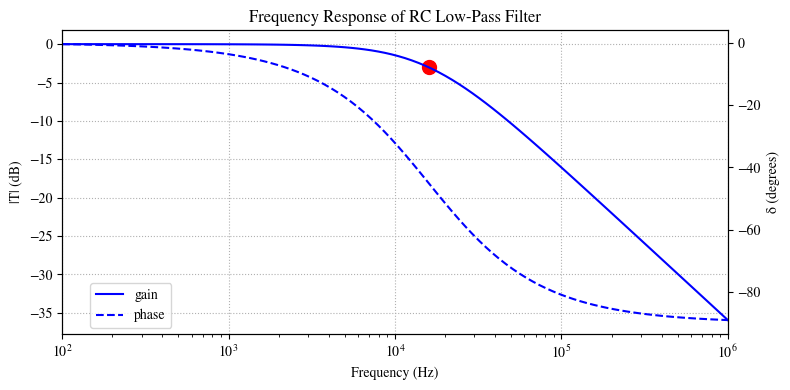

In [15]:
import matplotlib
import numpy as np
import matplotlib.pylab as plt
#%matplotlib widget
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

R = 10e3
C = 1e-9
frequencies = np.logspace(2, 6, 100)

gain_lp = np.array([lowpass_gain(R, C, f) for f in frequencies])
phase_lp = np.array([lowpass_delta_angle(R, C, f) for f in frequencies])

gain_db = 20 * np.log10(gain_lp)
f_c = 1 / (2 * np.pi * R * C)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title("Frequency Response of RC Low-Pass Filter")
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|T| (dB)')
ax1.plot(frequencies, gain_db, color='b', label='gain')
ax1.set_xscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.grid(axis='both', linestyle='dotted')

ax2 = ax1.twinx()
ax2.set_ylabel('δ (degrees)')
ax2.plot(frequencies, phase_lp, color='b', linestyle='dashed', label='phase')

ax1.scatter(f_c, 20 * np.log10(1 / np.sqrt(2)), color='r', s=100)

fig.legend(loc="lower left", bbox_to_anchor=(0.11, 0.15))
fig.tight_layout()

5.9.2 Create a new Bode plot for $|T|$ and $\delta$ as a function of $f$ (from 100Hz to 1MHz) for the high-pass filter with the same capacitance and resistance values and all the same considerations above.
- You will have to change the title of the plot.
- Changing the color may be nice (up to you).
- You will also need to change these two lines to change the phase shift axis ticks:
    - ax2.set_yticks(np.arange(0, 91, 20))
    - ax2.set_yticks(np.arange(0, 91, 5), minor=True)
- You can move the legend by altering the loc command (valid locations can be found here), and the bbox_to_anchor is used to offset the legend.
- Include a “scatter” point on your plot where the 3 dB frequency is. This will be a point where and .


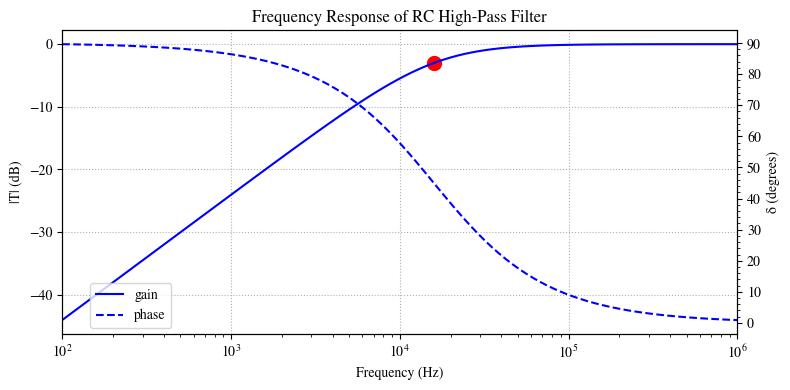

In [16]:
# Bode plot for high-pass filter
gain_hp = np.array([highpass_gain(R, C, f) for f in frequencies])
gain_hp_db = 20 * np.log10(gain_hp)
phase_hp = np.array([highpass_delta_angle(R, C, f) for f in frequencies])

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title("Frequency Response of RC High-Pass Filter")
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|T| (dB)')
ax1.set_xscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.plot(frequencies, gain_hp_db, color='b', label='gain')
ax1.grid(axis='both', linestyle='dotted')

ax2 = ax1.twinx()
ax2.set_ylabel('δ (degrees)')
ax2.plot(frequencies, phase_hp, color='b', linestyle='dashed', label='phase')
ax2.set_yticks(np.arange(0, 91, 10))
ax2.set_yticks(np.arange(0, 91, 2), minor=True)

ax1.scatter(f_c, 20 * np.log10(1 / np.sqrt(2)), color='r', s=100)

fig.legend(loc="lower left", bbox_to_anchor=(0.11, 0.15))
fig.tight_layout()

Create a new Bode plot for $|T|$ and $\delta$ as a function of $f$ (from 100Hz to 1MHz) for the bandpass filter with $R=1k\Omega$, $C = 10nF$, and $L = 10mH$ with all the same considerations above.
- You will have to change the title of the plot.
- Changing the color may be nice (up to you).
- You will have to alter the yticks for ax2 for this plot:
    - ax2.set_yticks(np.arange(-90, 91, 10))
    - ax2.set_yticks(np.arange(-90, 91, 2), minor=True)
- Make sure the legend is a nice place.
- Include two “scatter” points on your plot where the 3 dB frequency is. This will be a point for both $f = f_{c,-}$ and $f = f_{c,+}$ where $|T| = 1/\sqrt{2}|$, you can change the $s$ option in the scatter function to change the size of the dots on the plot.


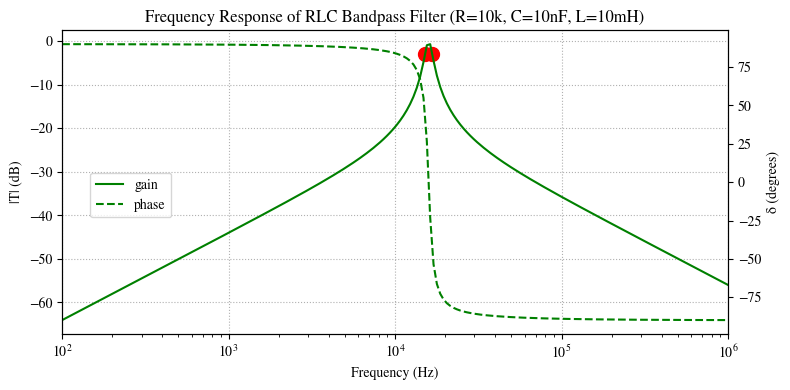

In [17]:
# Bode plot for RLC bandpass filter (R=10k, C=10nF, L=10mH)
r = 10e3
c = 10e-9
l = 10e-3

frequencies = np.logspace(2, 6, 200)

mags = np.array([bandpass_gain(r, l, c, f) for f in frequencies])
phases = np.array([bandpass_delta_angle(r, l, c, f) for f in frequencies])
mags_db = 20 * np.log10(mags)

# find 3dB crossing frequencies where |T| = 1/sqrt(2)
threshold = 1/np.sqrt(2)
mask = mags >= threshold
cross_indices = np.where(np.diff(mask.astype(int)) != 0)[0]

f_crosses = []
for i in cross_indices:
    f1, f2 = frequencies[i], frequencies[i + 1]
    m1, m2 = mags[i], mags[i + 1]
    if m2 != m1:
        f_cross = f1 + (threshold - m1) * (f2 - f1) / (m2 - m1)
        f_crosses.append(f_cross)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.set_title("Frequency Response of RLC Bandpass Filter (R=10k, C=10nF, L=10mH)")
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|T| (dB)')
ax1.plot(frequencies, mags_db, color='g', label='gain')
ax1.set_xscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.grid(axis='both', linestyle='dotted')

ax2 = ax1.twinx()
ax2.set_ylabel('δ (degrees)')
ax2.plot(frequencies, phases, color='g', linestyle='dashed', label='phase')

# scatter 3dB points
if f_crosses:
    ax1.scatter(f_crosses, [20 * np.log10(threshold)] * len(f_crosses), color='r', s=100)

fig.legend(loc="center left", bbox_to_anchor=(0.11, 0.5))
fig.tight_layout()

5.9.4 Create all three circuits above in LTspice (the low-pass, high-pass and bandpass filters with values you used for your plots). For testing the frequency response of filters, an AC Analysis is performed.
- Create all three circuits with unique voltage sources for each circuit.
- Set the values for the resistors, capacitors, and inductor.
- Right click the voltage source and select “Advanced”.
-Under “Small signal AC analysis(.AC)” set:
    - AC amplitude: 1
    - AC phase: 0
- The above configuration is specific for “AC Analysis” simulations.
- In the “Configure Analysis” prompt, select the “AC Analysis” tab and set
    - Type of sweep: decade
    - Number of points per decade: 10
    - Start frequency: 100
    - Stop frequency: 1000k (this is 1 MHz)
- Run the simulation and measure for each circuit.
- Screen shot each circuit and simulation result.

The Bode plots you made in Python are gain vs frequency and the simulated Bode plots are dB vs frequency. However, they should show the same general behavior. Compare your Bode plots to the simulation, and if the shapes are completely different it is likely that you made a mistake calculating $|T|$ or implementing $|T|$ as a Python function. Revise your plots if necessary.

LTSpice Circuit
![Circuit](Images/pre3-circuit.png)

Lowpass Simulation
![lowpass](Images/pre3-lowpass.png)

Highpass Simulation
![highpass](Images/pre3-highpass.png)

Bandpass Simulation
![bandpass](Images/pre3-bandpass-1.png)

Each of these match the predicted values.

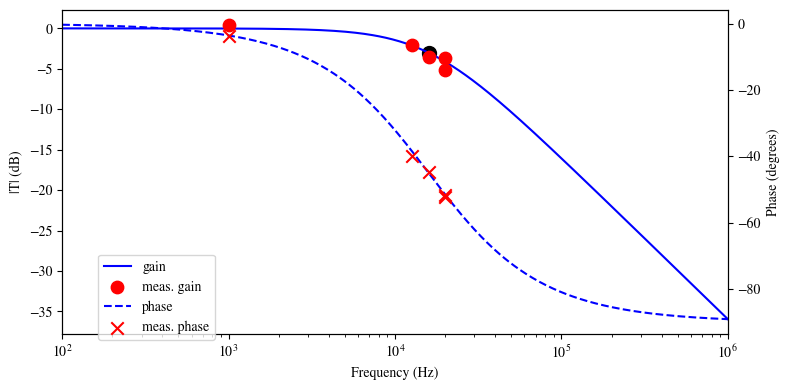

In [18]:
# Used Copilot to help generate fake measurement data
# --- Begin AI Generated Code --------
R_lp = 10e3
C_lp = 1e-9
freqs_bp = np.logspace(2, 6, 400)

gain_lp = np.array([lowpass_gain(R_lp, C_lp, f) for f in freqs_bp])
gain_lp_db = 20 * np.log10(gain_lp)
phase_lp_deg = np.array([lowpass_delta_angle(R_lp, C_lp, f) for f in freqs_bp])

f_c_lp = 1 / (2 * np.pi * R_lp * C_lp)

# create fake measurement points and store in Fortran-like (column-major) arrays
rng_local = np.random.default_rng(42)
sample_freqs = np.array([f_c_lp * 0.8, f_c_lp, f_c_lp * 1.25, 1e3, 2e4])
true_gain_db = np.interp(sample_freqs, freqs_bp, gain_lp_db)
true_phase_deg = np.interp(sample_freqs, freqs_bp, phase_lp_deg)

fake_gain_db = true_gain_db + rng_local.normal(0, 0.5, size=sample_freqs.shape)
fake_phase_deg = true_phase_deg + rng_local.normal(0, 1.0, size=sample_freqs.shape)
# --- End AI Generated Code --------

data_gain = np.array([[f, g] for f, g in zip(sample_freqs, fake_gain_db)], order='F')
data_phase = np.array([[f, p] for f, p in zip(sample_freqs, fake_phase_deg)], order='F')

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.set_xscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|T| (dB)')
ax1.plot(freqs_bp, gain_lp_db, color='b', label='gain')
ax1.scatter(data_gain[:,0], data_gain[:,1], color='r', s=80, zorder=5, label='meas. gain')

ax2 = ax1.twinx()
ax2.set_ylabel('Phase (degrees)')
ax2.plot(freqs_bp, phase_lp_deg, color='b', linestyle='dashed', label='phase')
ax2.scatter(data_phase[:,0], data_phase[:,1], color='r', marker='x', s=80, zorder=6, label='meas. phase')

# 3dB point
ax1.scatter(f_c_lp, 20 * np.log10(1 / np.sqrt(2)), color='k', s=100)

fig.legend(loc='lower left', bbox_to_anchor=(0.12, 0.12))
fig.tight_layout()
plt.show()